In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 불러오기
data = pd.read_csv("wine.csv")

# 데이터 분리 (특성 X, 타겟 y)
X = data.drop(columns=["Wine"])
y = data["Wine"]

C:\Users\wjdqh\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
# 특징 선택 (상위 k개의 관련성 높은 특징 선택)
k = 8  # 선택할 특징 개수
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [4]:
# 데이터 변환
X_selected = X_selected.astype(np.float32)
Y = pd.get_dummies(y).values.astype(np.float32)

In [5]:
# 훈련 / 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=0)

In [6]:
# 모델 정의
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\wjdqh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 343 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.2932 - loss: 99.6746 - val_accuracy: 0.1667 - val_loss: 12.7312
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2687 - loss: 4.5729 - val_accuracy: 0.3889 - val_loss: 1.0832
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2975 - loss: 1.1337 - val_accuracy: 0.3889 - val_loss: 1.0679
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3409 - loss: 1.1223 - val_accuracy: 0.3889 - val_loss: 1.0618
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3062 - loss: 1.1348 - val_accuracy: 0.3889 - val_loss: 1.0522
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3543 - loss: 1.0927 - val_accuracy: 0.3889 - val_loss: 1.0484
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2594 - loss: 1.1241 - val_accuracy: 0.4444 - val_loss: 1.0509
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4021 - loss: 1.0871 - val_accuracy: 0.4444 - val_loss: 1.05

In [9]:
# 예측 수행
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step 


In [10]:
# 성능 평가
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        16
           2       0.17      1.00      0.29         6

    accuracy                           0.17        36
   macro avg       0.06      0.33      0.10        36
weighted avg       0.03      0.17      0.05        36

[[ 0  0 14]
 [ 0  0 16]
 [ 0  0  6]]


C:\Users\wjdqh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wjdqh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wjdqh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


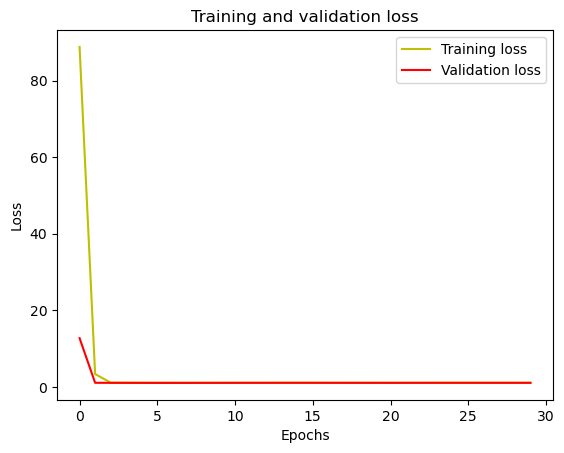

In [14]:
# 손실 그래프 시각화
plt.plot(model_history.history['loss'], 'y', label='Training loss')
plt.plot(model_history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

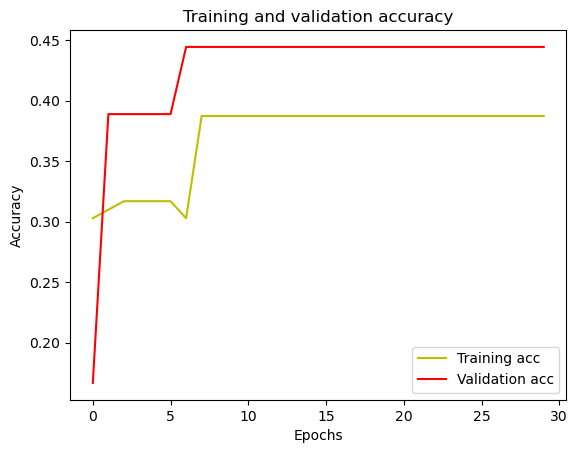

In [15]:
# 정확도 그래프 시각화
plt.plot(model_history.history['accuracy'], 'y', label='Training acc')
plt.plot(model_history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()